In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
data_missing_values = data.isnull().sum()
print("Missing Values in Every Column:\n", data_missing_values)

Missing Values in Every Column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
duplicates_values= data.duplicated().sum()
print(duplicates_values)

0


In [9]:
print(data.describe)

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [15]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [17]:
# Summary statistics for categorical features
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']

for feature in categorical_features:
    print(f"Summary statistics for {feature}:")
    print(data[feature].value_counts())
    print()


Summary statistics for Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Summary statistics for Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Summary statistics for SibSp:
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Summary statistics for Parch:
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Summary statistics for Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Summary statistics for Survived:
Survived
0    549
1    342
Name: count, dtype: int64



In [18]:
# Survival rate by passenger class
survival_by_class = data.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [19]:
# Survival rate by gender
survival_by_gender = data.groupby('Sex')['Survived'].mean()
print(survival_by_gender)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [22]:
# Binning age into categories and calculating survival rates
bins = [0, 12, 20, 40, 60, 80]
labels = ['0-12', '13-20', '21-40', '41-60', '61-80']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)
survival_by_age_group = data.groupby('AgeGroup')['Survived'].mean()
print(survival_by_age_group)

AgeGroup
0-12     0.579710
13-20    0.381818
21-40    0.364769
41-60    0.390625
61-80    0.227273
Name: Survived, dtype: float64


C:\Users\princ_vn\AppData\Local\Temp\ipykernel_58340\1389684201.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = data.groupby('AgeGroup')['Survived'].mean()


In [24]:
# Binning fare into categories and calculating survival rates
fare_bins = [0, 10, 30, 50, 100, 600]
fare_labels = ['0-10', '11-30', '31-50', '51-100', '101+']
data['FareGroup'] = pd.cut(data['Fare'], bins=fare_bins, labels=fare_labels)
survival_by_fare_group = data.groupby('FareGroup')['Survived'].mean()
print(survival_by_fare_group)

FareGroup
0-10      0.205607
11-30     0.433022
31-50     0.364865
51-100    0.654206
101+      0.735849
Name: Survived, dtype: float64


C:\Users\princ_vn\AppData\Local\Temp\ipykernel_58340\1356335226.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare_group = data.groupby('FareGroup')['Survived'].mean()


In [25]:
# Correlation matrix
correlation_matrix = data[['Survived', 'Age', 'Fare']].corr()
print(correlation_matrix)

          Survived       Age      Fare
Survived  1.000000 -0.064910  0.257307
Age      -0.064910  1.000000  0.096688
Fare      0.257307  0.096688  1.000000


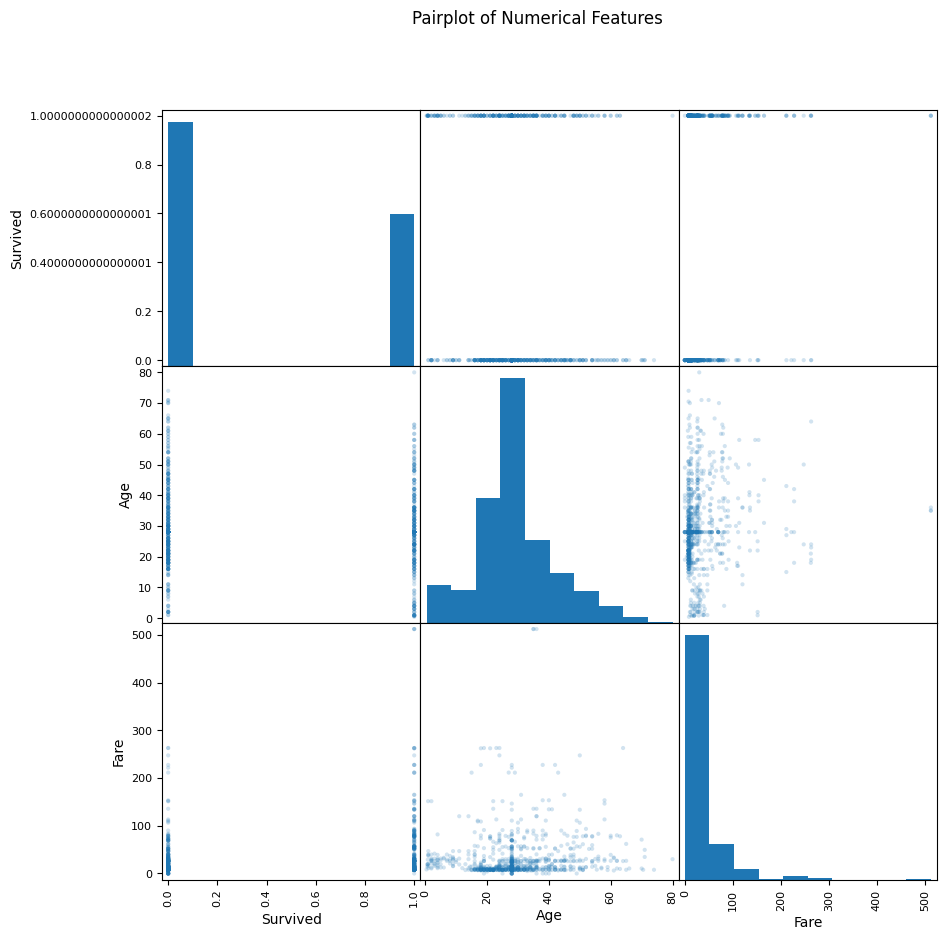

In [26]:
# Pairplot using pandas scatter_matrix
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(data[['Survived', 'Age', 'Fare']], alpha=0.2, figsize=(10, 10))
plt.suptitle('Pairplot of Numerical Features')
plt.show()

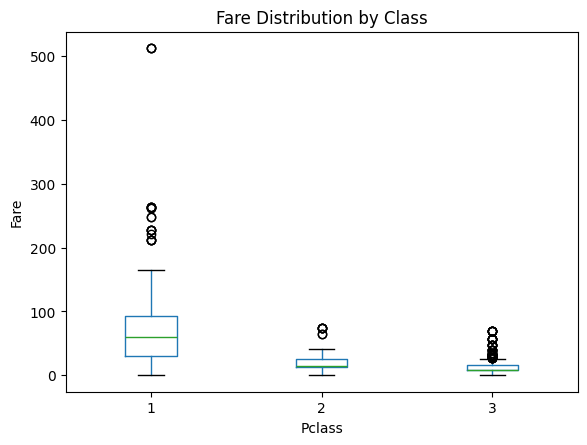

In [27]:
# Boxplot of Fare by Class using pandas
boxplot = data.boxplot(column='Fare', by='Pclass', grid=False)
boxplot.set_title('Fare Distribution by Class')
boxplot.set_ylabel('Fare')
plt.suptitle('')
plt.show()